# **Capstone project: Providing data-driven suggestions for HR**

## Four Stages of Project

PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

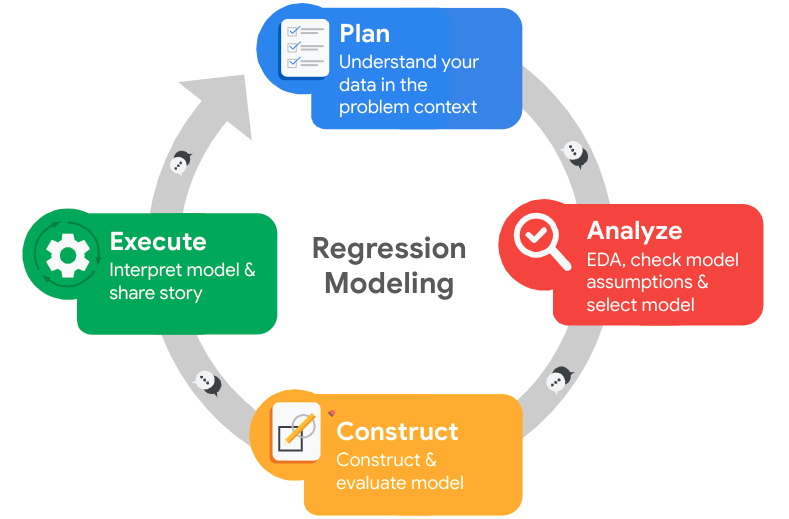



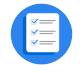

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

In [ ]:
#!pip install pycaret
#!pip install --upgrade numpy
#!pip install --upgrade pip

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# Load dataset into a dataframe
df0 = pd.read_csv("/content/HR_comma_sep.csv")
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
print(df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Gather descriptive statistics about the data

In [34]:
# Gather descriptive statistics about the data
display(df0.describe())

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_monthly_hours  time_spend_company  work_accident       is_left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'is_left',
       'promotion_last_5years', 'work_department', 'salary_category']

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'is_left', 'promotion_last_5years', 'work_department',
       'salary_category'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
is_left                  0
promotion_last_5years    0
work_department          0
salary_category          0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  work_accident  is_left  \
396                      139                   3              0        1   
866                      128                   3              0        1   
1317                     127                   3              0        1   
1368                     132                   3              0        1   
1461                     142                   3              0        1   
...                      ...                 ...            ...      ...   
14994                    151                   3              0        1   
14995                    160                   3              0        1   
14996                    143                   3              0        1   
14997                    280                   4              0        1   
14998                    158                   3              0        1   

       promotion_last_5years work_department salary_category  
396                        0           sales             low  
866                        0      accounting             low  
1317                       0           sales          medium  
1368                       0           RandD             low  
1461                       0           sales             low  
...                      ...             ...             ...  
14994                      0         support             low  
14995                      0         support             low  
14996                      0         support             low  
14997                      0         support             low  
14998                      0         support             low  

[3008 rows x 10 columns]

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates().copy()
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  is_left  promotion_last_5years  \
0                   3              0        1                      0   
1                   6              0        1                      0   
2                   4              0        1                      0   
3                   5              0        1                      0   
4                   3              0        1                      0   

  work_department salary_category  
0           sales             low  
1           sales          medium  
2           sales          medium  
3           sales             low  
4           sales             low

### Check outliers

Check for outliers in the data.

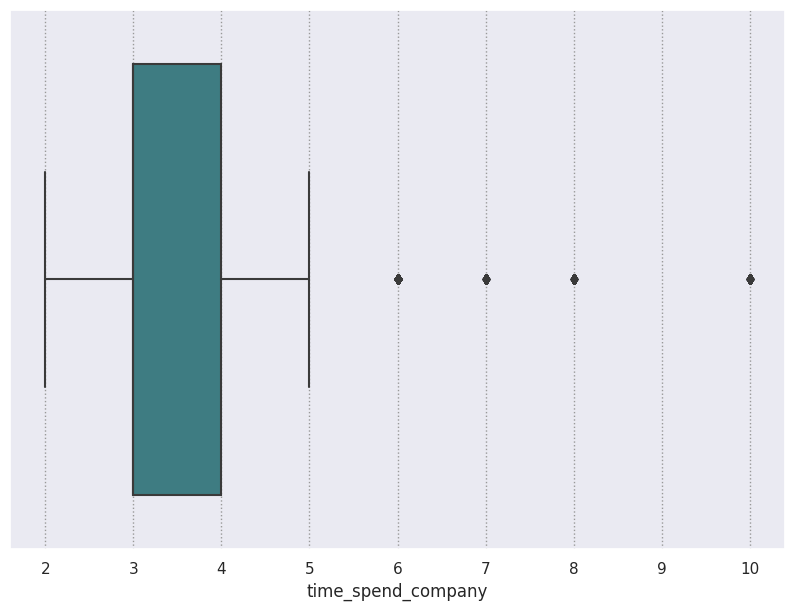

In [13]:
# Create a boxplot to visualize distribution of `time_spend_company` and detect any outliers
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.boxplot(data = df1, x="time_spend_company", palette="crest")
plt.show()

In [14]:
# Determine the number of rows containing outliers
def outliers(df,col):
    q1=df[col].quantile(0.25)

    q3=df[col].quantile(0.75)

    IQR=q3-q1

    outliers = df[((df[col]<(q1-1.5*IQR)) | (df[col]>(q3+1.5*IQR)))]

    return outliers
# This calculates and provides a reliable outlier detection. 
# We could find the time_spend_company>5, but we shouldn't rely on visualizations when we do calculations.
print("Number of outliers in the time_spend_company column is :",len(outliers(df1,"time_spend_company")["time_spend_company"]))

Number of outliers in the time_spend_company column is : 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

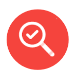
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

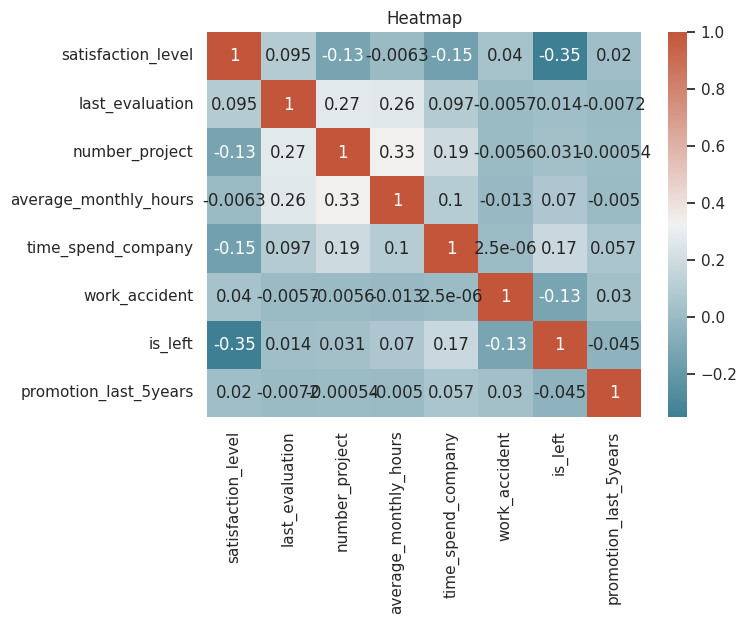

In [15]:
# Create a heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(numeric_only=True),annot=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Heatmap")
plt.show()

There is a positive correlation between monthly average hours and number of project. This makes sense since more projects will probably take more time.
There is a negative correlation between satisfaction_level and is_left columns. People who are more satisfied from their job leave the company less. 
These correlations are not very strong. It is very normal because in real world, the features generally don't have strong linear relationships. It also may be because of outliers. However, we will not drop the outliers since they are likely to contain helpful information most of the time. However, if the results don't make us satisfied, we may consider dropping the outliers.

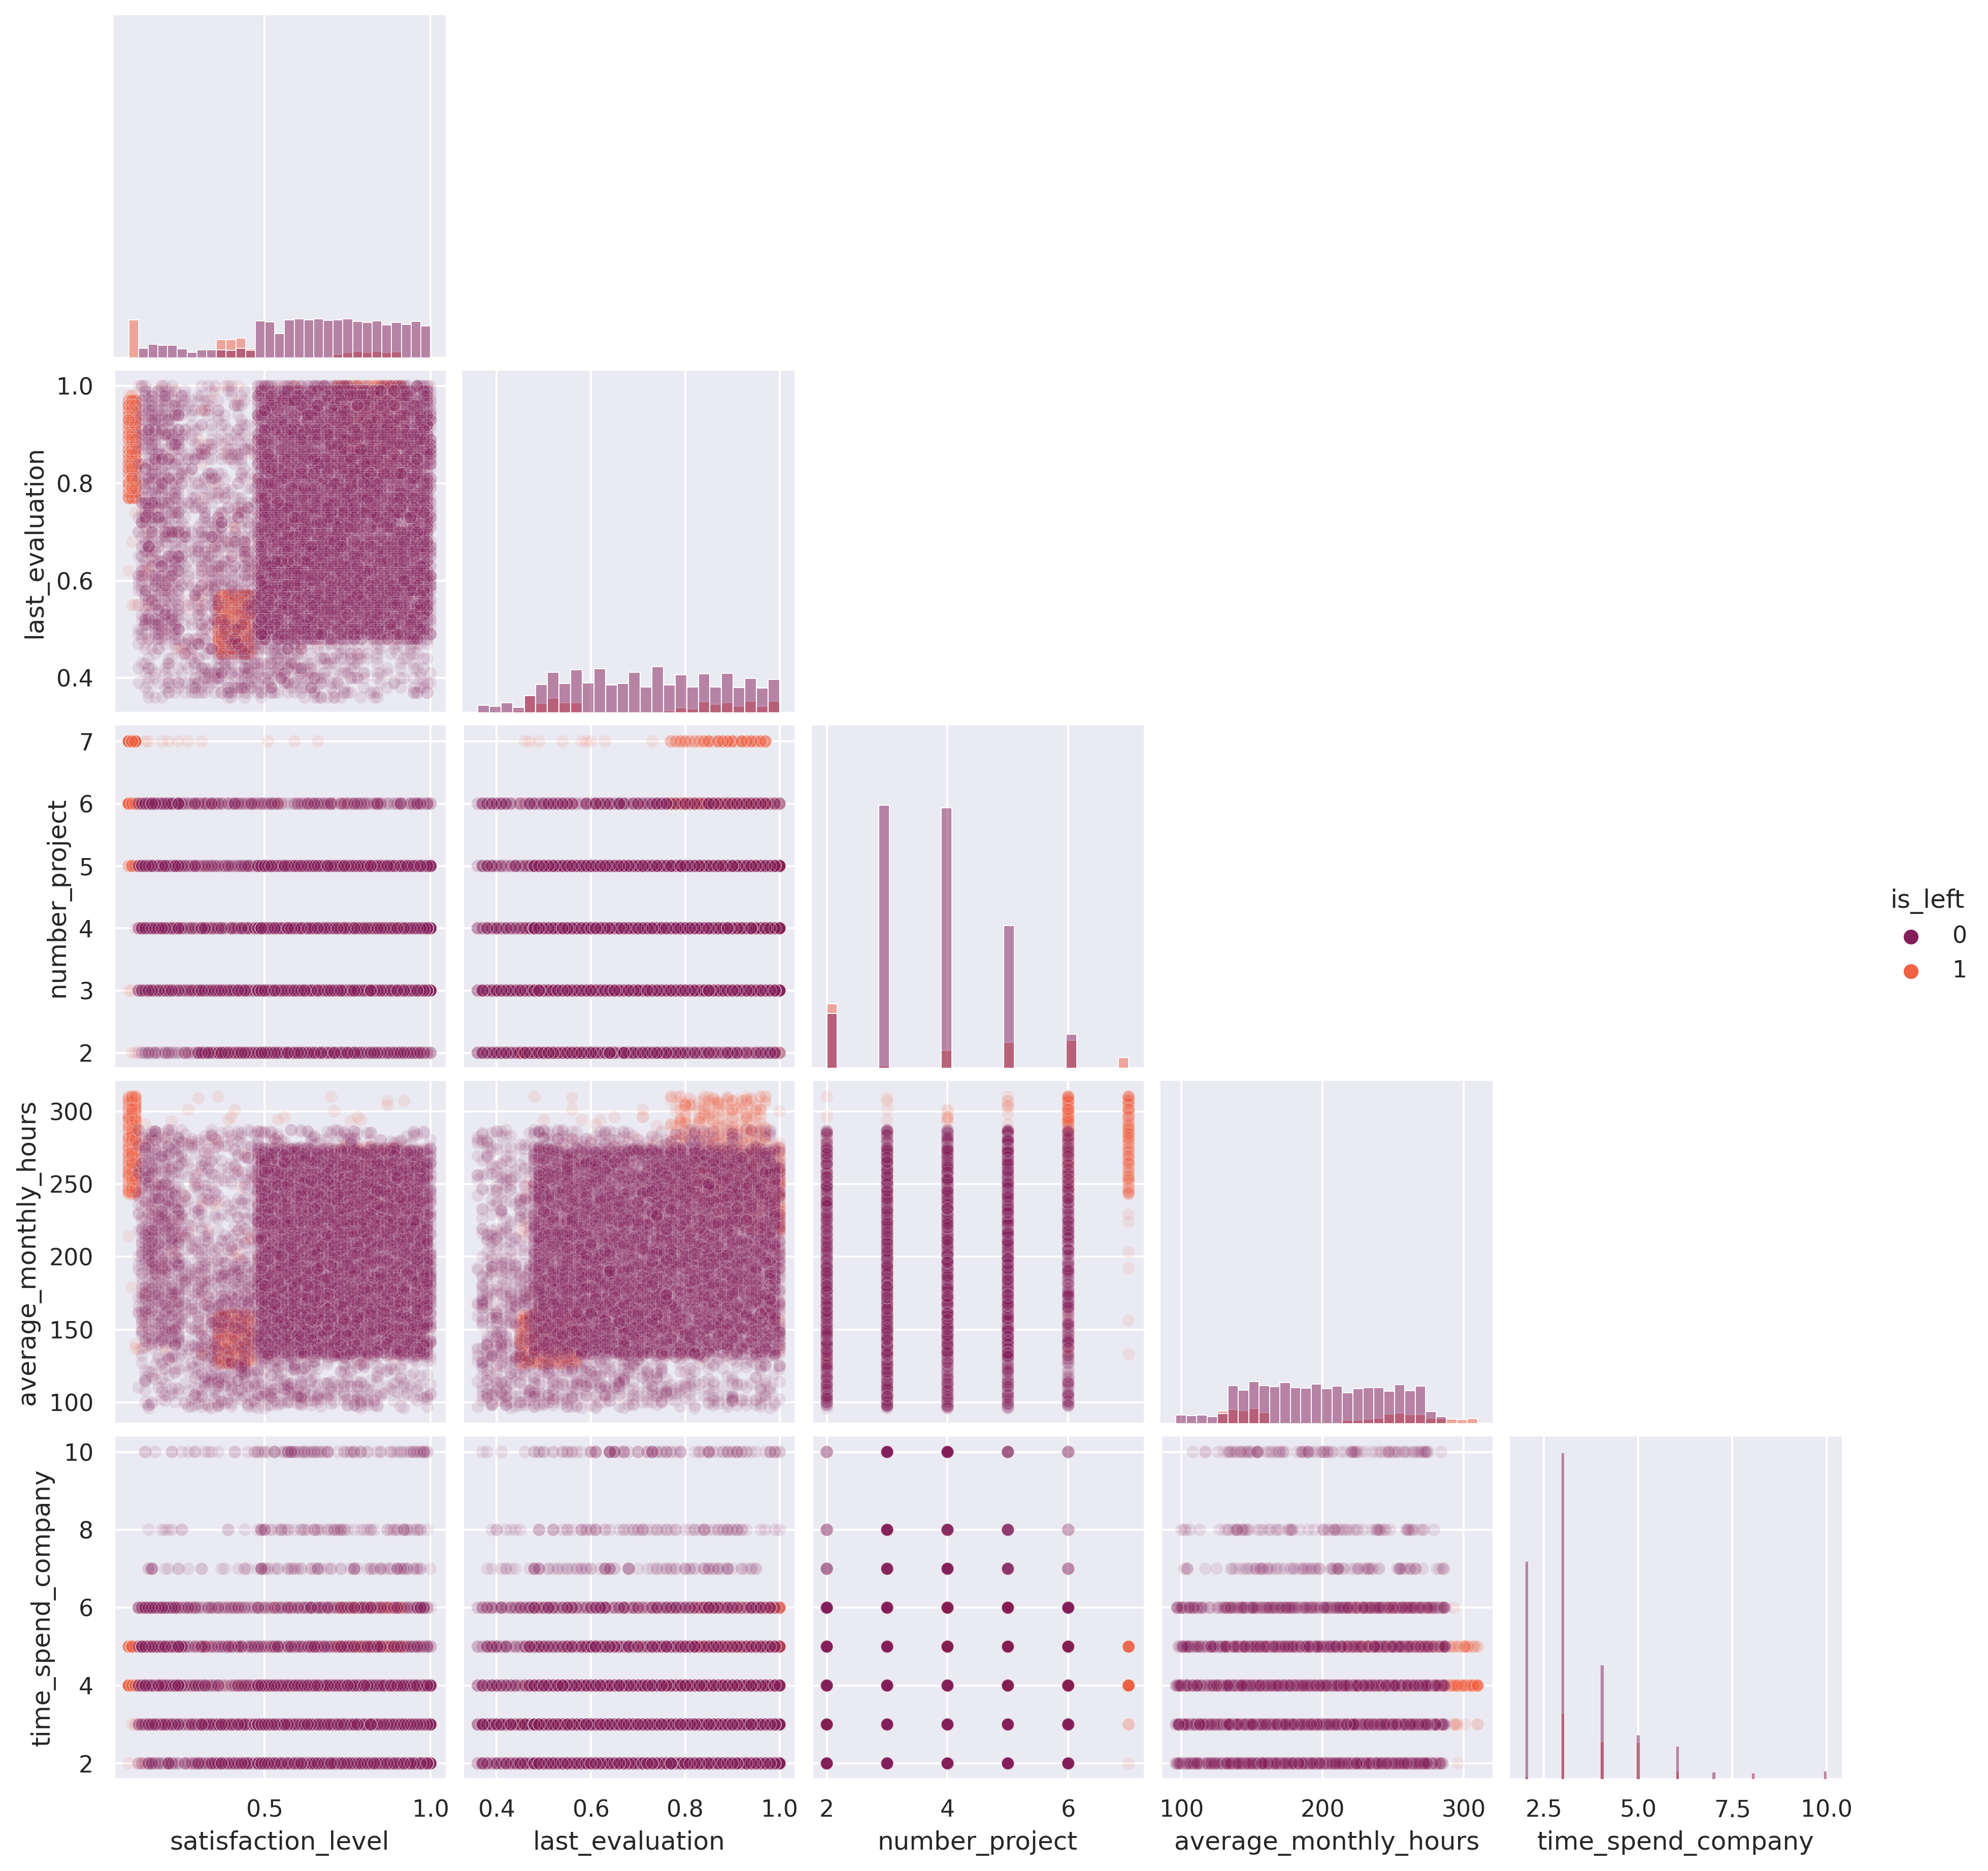

In [33]:
# I like this plot when i don't have enough time. However, i will investigate these seperately.
# I used this for only see some patterns and investigate them in the next cells.
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.pairplot(df1[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 
       'is_left',]],hue="is_left",corner=True,diag_kind="hist",palette="rocket",plot_kws={'alpha':0.1})
plt.show()

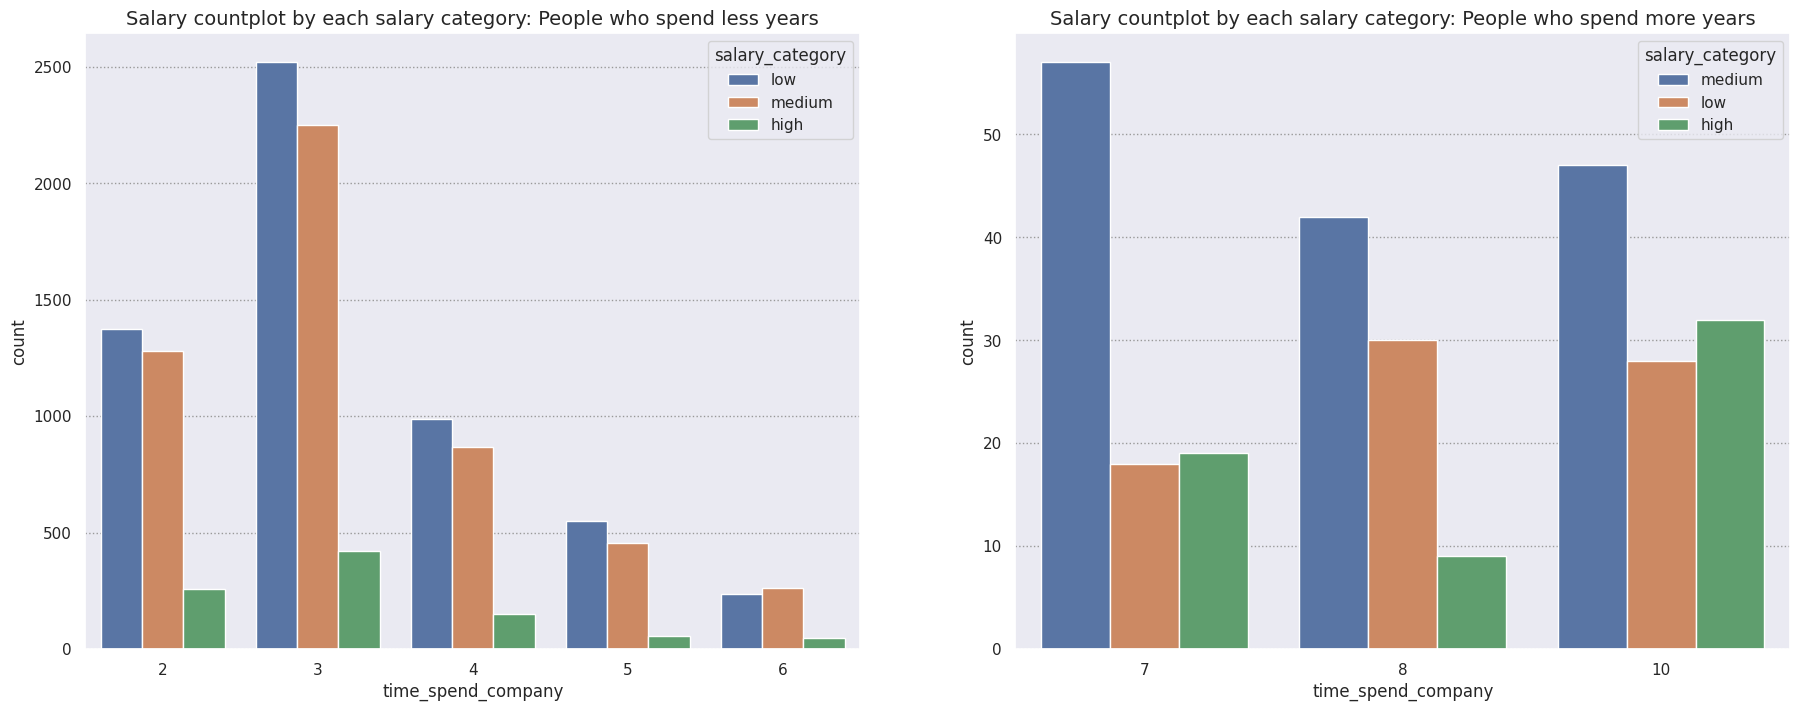

In [17]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define employees who work less number of years
short_time = df1[df1['time_spend_company'] < 7]

# Define employees who work more number of years
long_time = df1[df1['time_spend_company'] > 6]
# Plotting count of people who spend less years in company by salary categories
sns.countplot(short_time,x="time_spend_company",hue="salary_category",ax=ax[0])
ax[0].set_title('Salary countplot by each salary category: People who spend less years', fontsize='14')
# Plotting count of people who spend more years in company by salary categories
sns.countplot(long_time,x="time_spend_company",hue="salary_category",ax=ax[1])
ax[1].set_title('Salary countplot by each salary category: People who spend more years', fontsize='14')
plt.show()


It is obvious, even people who stay in company for a long time are having trouble to get raises. Also, number of people are decreases as number of years they spend increases. This company loses employees who they trained. 

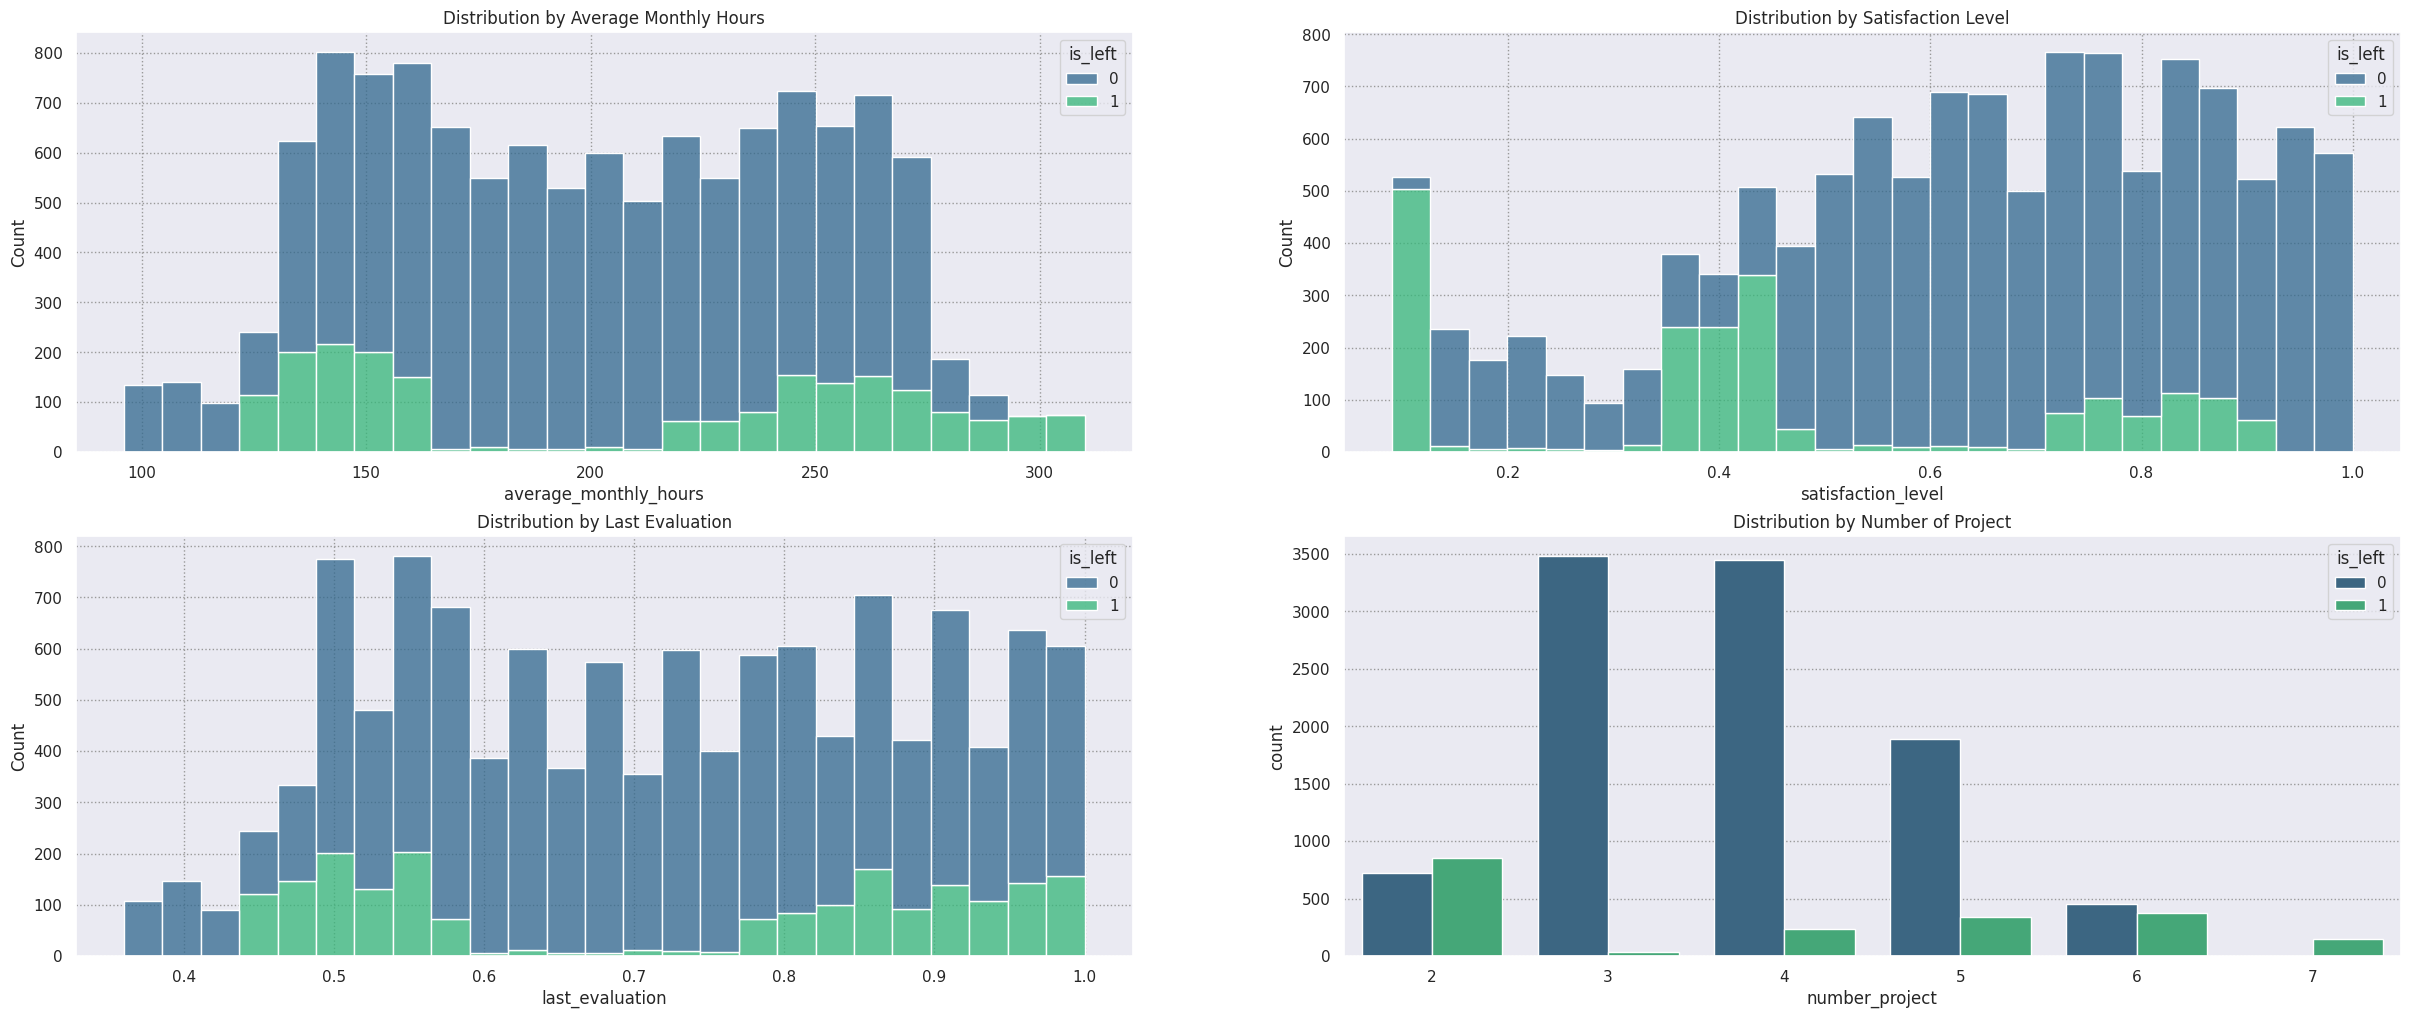

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (30,12))
sns.histplot(data=df1,x='average_monthly_hours',bins=25,hue='is_left',multiple='stack',palette='viridis',ax=ax[0][0])
ax[0][0].set_title("Distribution by Average Monthly Hours")
sns.histplot(data=df1,x='satisfaction_level',bins=25,hue='is_left',multiple='stack',palette='viridis',ax=ax[0][1])
ax[0][1].set_title("Distribution by Satisfaction Level")
sns.histplot(data=df1,x='last_evaluation',bins=25,hue='is_left',multiple='stack',palette='viridis',ax=ax[1][0])
ax[1][0].set_title("Distribution by Last Evaluation")
sns.countplot(data=df1,x='number_project',hue='is_left',palette='viridis',ax=ax[1][1])
ax[1][1].set_title("Distribution by Number of Project")
plt.show()

We can see there are some similar patterns in terms of distribution of average_monthly_hours and last_evaluation. When they are above some threshold, tendency to leave increases. Also, there are some people who leave when these are low(but not least). We will see the patterns between these two columns in a scatter plot later. 
Also, we can see that the optimum number of project one works on is 3. When it gets bigger or smaller than 3, the turnover rate rapidly.

People leave the company most when satisfaction level is close to zero. After that, second bigger group's satisfaction level is between 0.3 and 0.5. Third and last group we can clearly identify has satisfaction level around 0.8(0.7-0.9 range).

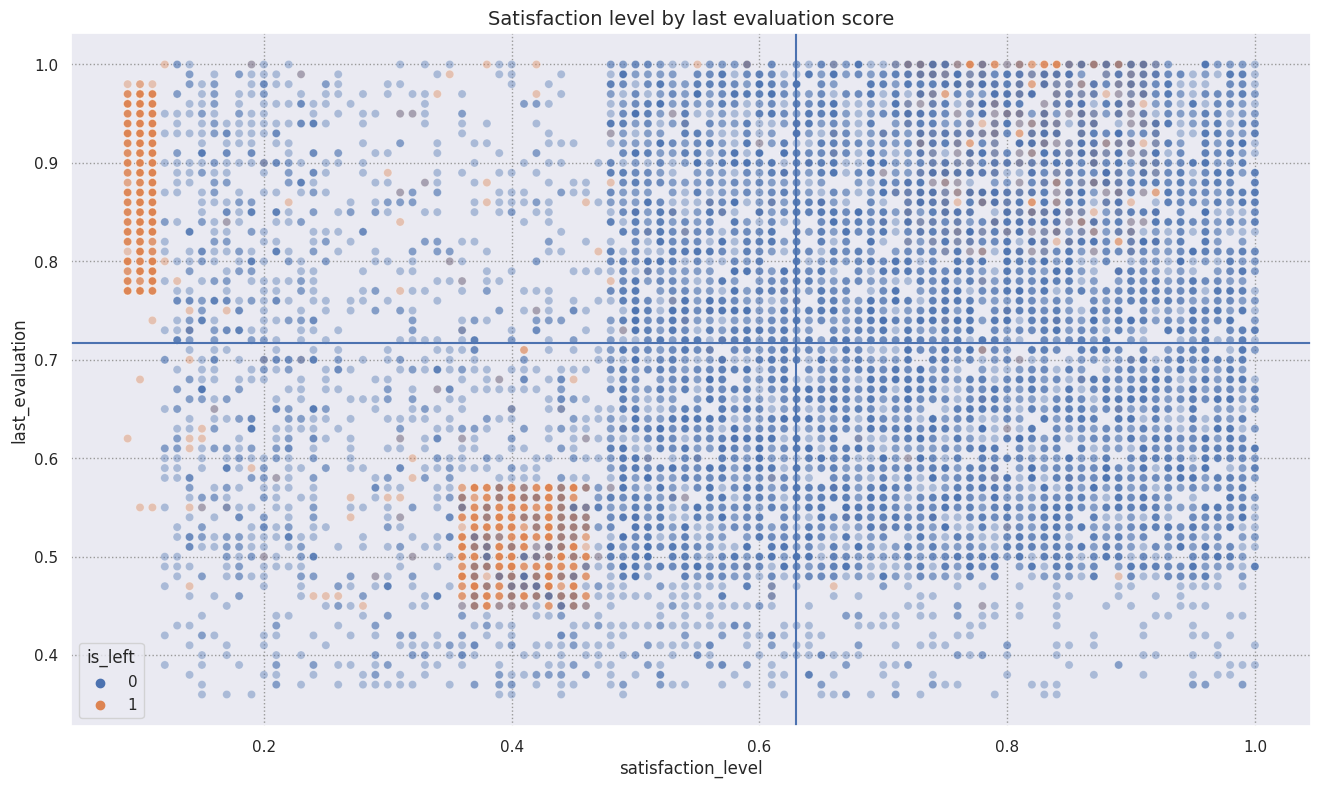

In [19]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='satisfaction_level', y='last_evaluation', hue='is_left', alpha=0.4)
plt.axvline(x=df1["satisfaction_level"].mean())
plt.axhline(y=df1["last_evaluation"].mean())
plt.title('Satisfaction level by last evaluation score', fontsize='14');

People with less satisfaction and high last evaluation score tend to leave.
There is a sizeable group whose satisfaction level is below average (between 0.35 and 0.45) and last evaluation is below average(between 0.45 and 0.57). This group mostly leave the company. 
There is another group whose satisfaction levels are really low(almost zero) and last evaluation score is very high(bw 0.75-0.97). 
These almost perfectly geometric shapes indicates that the data is probably not from real world, but is synthesized by people or computers.

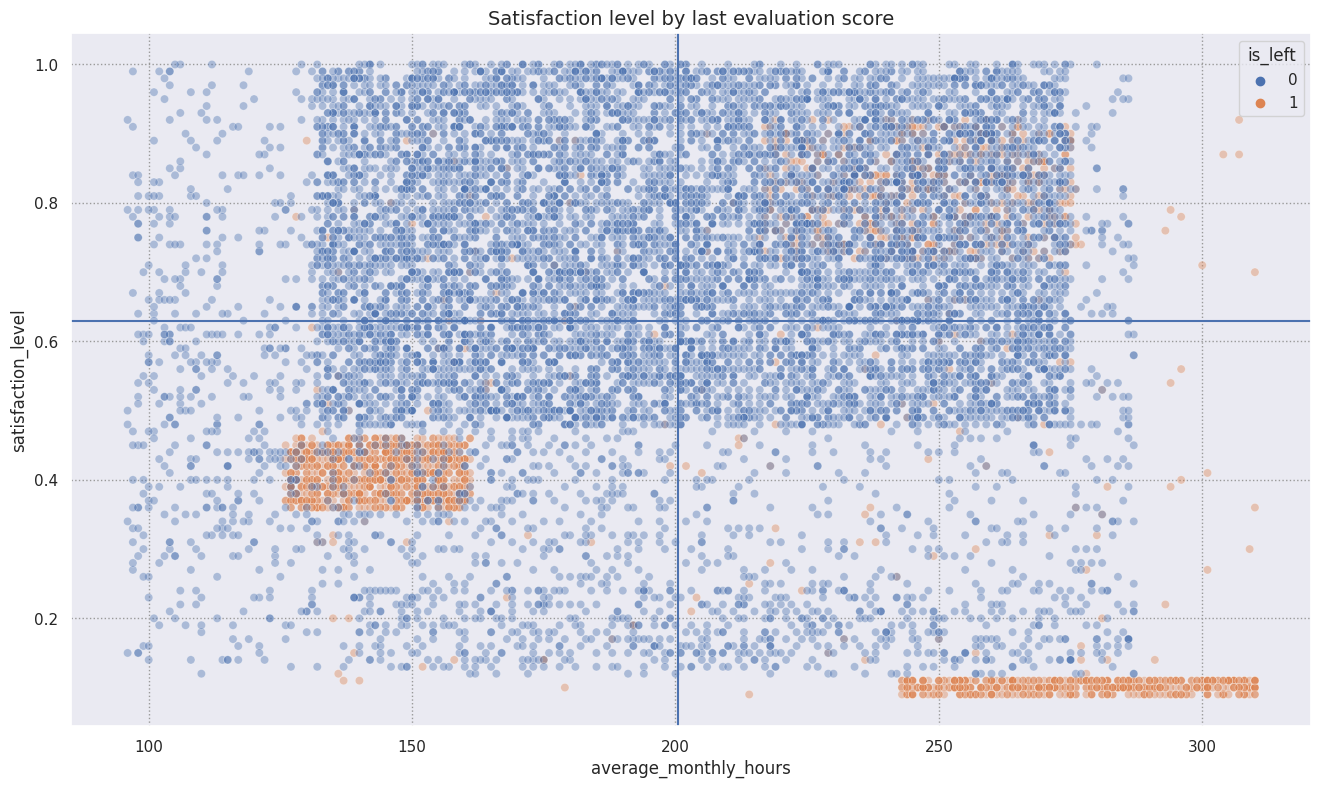

In [20]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='is_left', alpha=0.4)
plt.axvline(x=df1["average_monthly_hours"].mean())
plt.axhline(y=df1["satisfaction_level"].mean())
plt.title('Satisfaction level by last evaluation score', fontsize='14');

There is a sizeable group in the right bottom of the graph. Their satisfaction level is around zero(0.1, far below the average) and monthly average hours is far above the average(bw. 240-320). 
Other group worked around 125-165 hours per month, and their satisfaction level is between around 0.35 and 0.45.


Lastly, there is a group who worked ~210-280 hours per month, and they had satisfaction levels ranging ~0.7-0.9. 

<Figure size 1600x900 with 0 Axes>

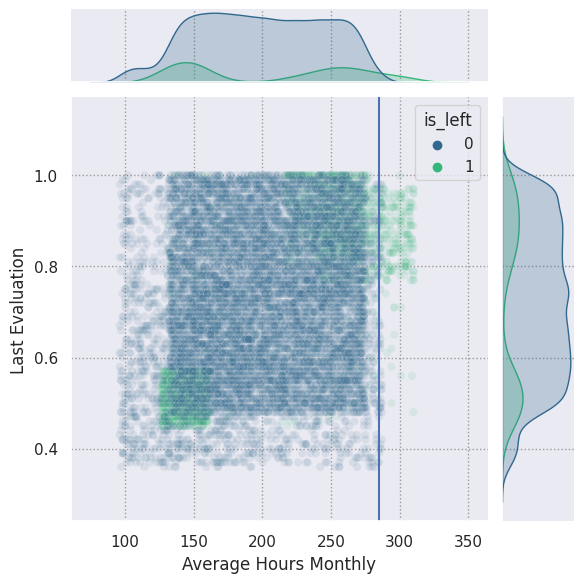

Correlation of these columns is:  0.26467755067263893
343 0.7230320699708455
238 0.8487394957983193
163 1.0


In [21]:
plt.figure(figsize=(16, 9))
sns.jointplot(data=df1,x="average_monthly_hours",y="last_evaluation",hue="is_left",palette="viridis",alpha=0.1)
plt.xlabel("Average Hours Monthly")
plt.ylabel("Last Evaluation")
plt.axvline(x=285)
plt.show()
print("Correlation of these columns is: ",df1.average_monthly_hours.corr(df1.last_evaluation))
print(df1[df1["average_monthly_hours"]>280]["is_left"].count(),df1[df1["average_monthly_hours"]>280]["is_left"].mean())
print(df1[df1["average_monthly_hours"]>285]["is_left"].count(),df1[df1["average_monthly_hours"]>285]["is_left"].mean())
print(df1[df1["average_monthly_hours"]>290]["is_left"].count(),df1[df1["average_monthly_hours"]>290]["is_left"].mean())

This jointplot(scatter plot) shows us two groups who tend to leave the company. 
1. Underworked employees with low performance
2. Overworked employees with high performance.
There is not a high correlation between monthly average hours and last evaluation but there is a positive correlation which means they have a tendency to increase or decrease together.
By looking rightmostside of the scatterplot, we see that there is a threshold for average hours monthly that almost every person above this threshold left the company.
1. 84% of the 238 employee who worked more than 285 hours a month have left the company
2. 100% of 163 people who worked more than 290 hours have left the company.  

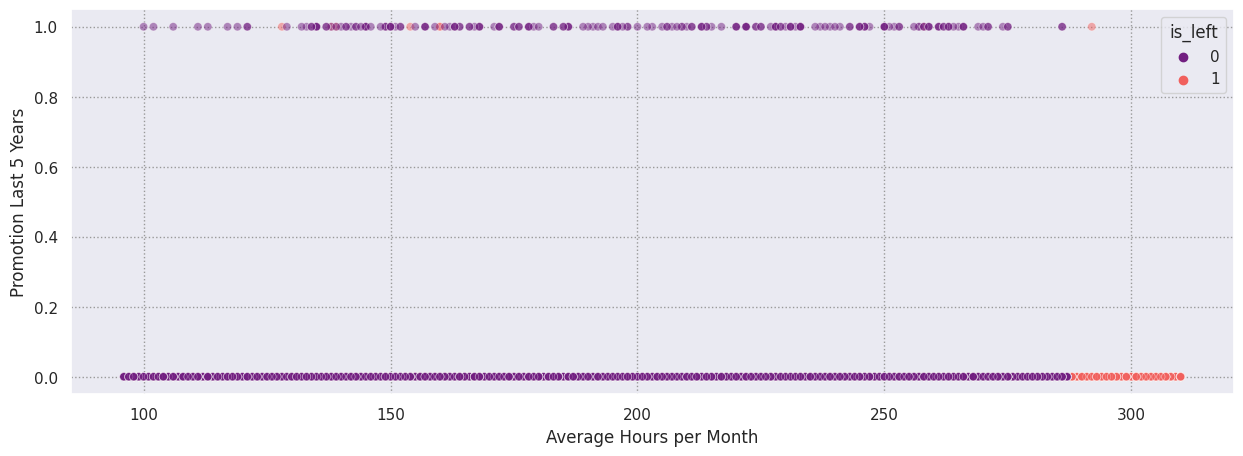

In [22]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df1, x="average_monthly_hours", y="promotion_last_5years", hue="is_left", palette="magma",alpha=0.5)
plt.xlabel("Average Hours per Month")
plt.ylabel("Promotion Last 5 Years")
plt.show()

A small percentage of people who work the most are promoted.
Most of the people who left are the people who work hardest but not promoted.

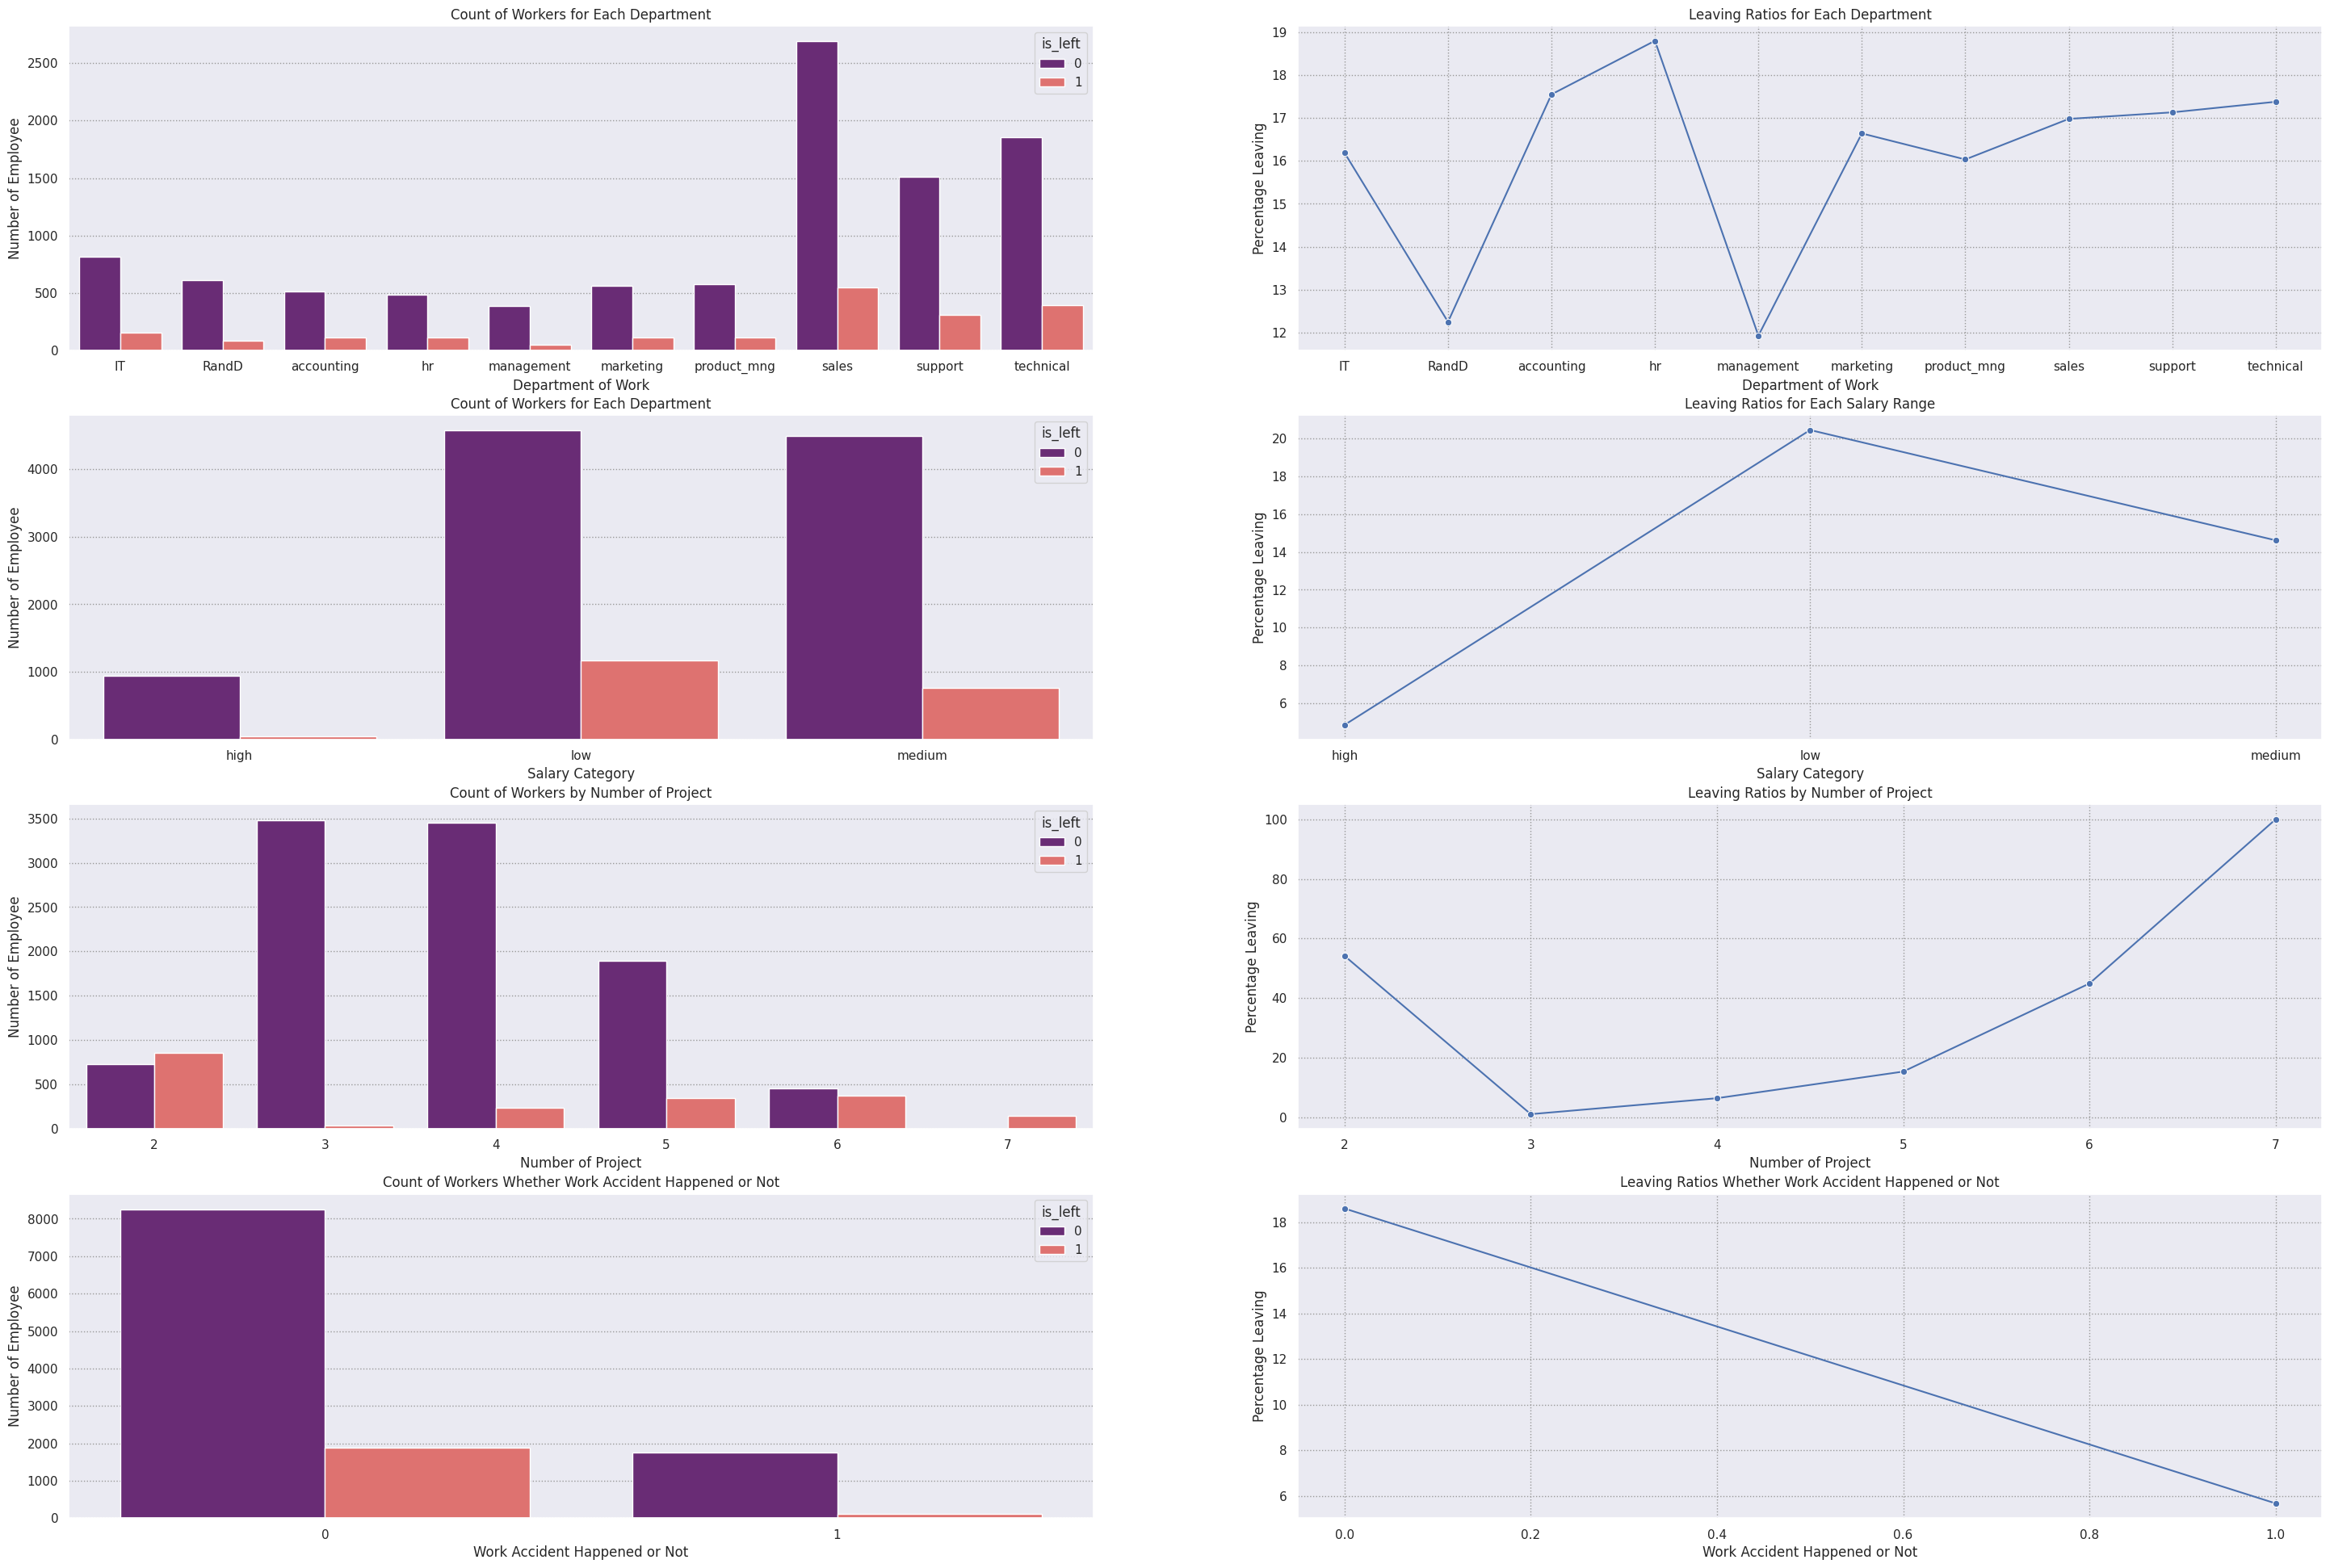

In [23]:
# Create some plots for counts and percentages for different categories.
fig, ax = plt.subplots(4, 2, figsize = (36,24))

sns.countplot(data=df1,x="work_department",hue="is_left",palette="magma",ax=ax[0][0],order=df1.groupby("work_department")["is_left"].mean().index)
ax[0][0].set_xlabel("Department of Work")
ax[0][0].set_ylabel("Number of Employee")
ax[0][0].set_title("Count of Workers for Each Department")

sns.lineplot(x=df1.groupby("work_department")["is_left"].mean().index,y=df1.groupby("work_department")["is_left"].mean()*100,ax=ax[0][1],marker="o")
ax[0][1].set_xlabel("Department of Work")
ax[0][1].set_ylabel("Percentage Leaving")
ax[0][1].set_title("Leaving Ratios for Each Department")

sns.countplot(data=df1,x="salary_category",hue="is_left",palette="magma",ax=ax[1][0],order=df1.groupby("salary_category")["is_left"].mean().index)
ax[1][0].set_xlabel("Salary Category")
ax[1][0].set_ylabel("Number of Employee")
ax[1][0].set_title("Count of Workers for Each Department")

sns.lineplot(x=df1.groupby("salary_category")["is_left"].mean().index,y=df1.groupby("salary_category")["is_left"].mean()*100,ax=ax[1][1],marker="o")
ax[1][1].set_xlabel("Salary Category")
ax[1][1].set_ylabel("Percentage Leaving")
ax[1][1].set_title("Leaving Ratios for Each Salary Range")

sns.countplot(data=df1,x="number_project",hue="is_left",palette="magma",ax=ax[2][0],order=df1.groupby("number_project")["is_left"].mean().index)
ax[2][0].set_xlabel("Number of Project")
ax[2][0].set_ylabel("Number of Employee")
ax[2][0].set_title("Count of Workers by Number of Project")

sns.lineplot(x=df1.groupby("number_project")["is_left"].mean().index,y=df1.groupby("number_project")["is_left"].mean()*100,ax=ax[2][1],marker="o")
ax[2][1].set_xlabel("Number of Project")
ax[2][1].set_ylabel("Percentage Leaving")
ax[2][1].set_title("Leaving Ratios by Number of Project")

sns.countplot(data=df1,x="work_accident",hue="is_left",palette="magma",ax=ax[3][0],order=df1.groupby("work_accident")["is_left"].mean().index)
ax[3][0].set_xlabel("Work Accident Happened or Not")
ax[3][0].set_ylabel("Number of Employee")
ax[3][0].set_title("Count of Workers Whether Work Accident Happened or Not")

sns.lineplot(x=df1.groupby("work_accident")["is_left"].mean().index,y=df1.groupby("work_accident")["is_left"].mean()*100,ax=ax[3][1],marker="o")
ax[3][1].set_xlabel("Work Accident Happened or Not")
ax[3][1].set_ylabel("Percentage Leaving")
ax[3][1].set_title("Leaving Ratios Whether Work Accident Happened or Not")
plt.show()


Hr, accounting, technical, support and sales have high leaving percentage. RandD and management departments have low leaving percentage.
We can see that data is imbalanced. There are almost zero example about paid employees who left. Our model might have hard time detecting these. As salary increases, tendency to leave decreases.
All of the people who did 7 projects have left the company.
Leaving ratio is more when number of project is very low or very high. 3 project is optimum if we want to keep employees in the firm.

People who experienced work accident is much less likely to leave the company(~5%; opposite group is ~19%)


There is not strong linear relationship between is_left and other columns.
Whether the employee got promoted in last 5 years or not has a big impact on turnovers. People who got promoted in last 5 years tend to stay in company, however their number is much smaller than people who have not got promoted. 
People who have greater salary tend to stay in the firm.
People who had work accident have more tendency to stay in the company as well.
People who worked on most and least project have more tendency to leave the company. People who worked on average number of project which is 3,4 has much less ratio of leaving the company.
As salary increases, turnover rate decreases. 
These are some basic intuitions that will help our model to find some patterns between features and target.



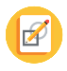
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a binary classification problem. The model is expected predict one of the two categories, which are 0 and 1.

### Identify the types of models most appropriate for this task.

Because our data has non linearities, tree based algorithm or KNN might work best. 

### Modeling



In [20]:
# Before build the model, we should prepare our data. 
# There are some categorical features, We will convert them into numerical format by encoding.
target = df1["is_left"].copy()
df1 = df1.drop("is_left",axis=1)
df2 = pd.get_dummies(df1)
df2.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  promotion_last_5years  \
0                   3              0                      0   
1                   6              0                      0   
2                   4              0                      0   
3                   5              0                      0   
4                   3              0                      0   

   work_department_IT  work_department_RandD  work_department_accounting  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   work_department_hr  work_department_management  work_department_marketing  \
0                   0                           0                          0   
1                   0                           0                          0   
2                   0                           0                          0   
3                   0                           0                          0   
4                   0                           0                          0   

   work_department_product_mng  work_department_sales  \
0                            0                      1   
1                            0                      1   
2                            0                      1   
3                            0                      1   
4                            0                      1   

   work_department_support  work_department_technical  salary_category_high  \
0                        0                          0                     0   
1                        0                          0                     0   
2                        0                          0                     0   
3                        0                          0                     0   
4                        0                          0                     0   

   salary_category_low  salary_category_medium  
0                    1                       0  
1                    0                       1  
2                    0                       1  
3                    1                       0  
4                    1                       0

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2,target,test_size=0.4,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(7194, 20) (7194,) (2398, 20) (2398,) (2399, 20) (2399,)


In [22]:
# Decision tree based models generally does not require scaling or normalization, however there is no harm to do it.
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train_scl = pd.DataFrame(scl.fit_transform(X_train),columns=X_train.columns)
X_val_scl = pd.DataFrame(scl.transform(X_val),columns=X_val.columns)
X_test_scl = pd.DataFrame(scl.transform(X_test),columns=X_test.columns)
display(X_train_scl.head())
display(X_val_scl.head())
display(X_test_scl.head())

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0           -0.204976        -0.700482       -0.702311              -1.876644   
1            0.911860        -0.878975        0.157676               0.307242   
2           -0.453161        -0.759980        1.017664              -1.052536   
3            1.366866         1.143944       -0.702311               1.151953   
4            0.125938        -0.402994        1.017664              -0.825907   

   time_spend_company  work_accident  promotion_last_5years  \
0           -0.277079       2.366432              -0.137244   
1           -1.026160      -0.422577              -0.137244   
2           -1.026160      -0.422577              -0.137244   
3           -0.277079      -0.422577              -0.137244   
4           -0.277079      -0.422577              -0.137244   

   work_department_IT  work_department_RandD  work_department_accounting  \
0           -0.301374              -0.249316                   -0.227834   
1           -0.301374              -0.249316                   -0.227834   
2           -0.301374              -0.249316                   -0.227834   
3           -0.301374              -0.249316                   -0.227834   
4           -0.301374              -0.249316                   -0.227834   

   work_department_hr  work_department_management  work_department_marketing  \
0           -0.227496                   -0.200491                  -0.252446   
1           -0.227496                   -0.200491                  -0.252446   
2           -0.227496                   -0.200491                  -0.252446   
3           -0.227496                   -0.200491                  -0.252446   
4           -0.227496                   -0.200491                  -0.252446   

   work_department_product_mng  work_department_sales  \
0                    -0.248056              -0.605509   
1                     4.031352              -0.605509   
2                    -0.248056               1.651503   
3                    -0.248056              -0.605509   
4                    -0.248056              -0.605509   

   work_department_support  work_department_technical  salary_category_high  \
0                 2.391043                     -0.478             -0.308454   
1                -0.418228                     -0.478             -0.308454   
2                -0.418228                     -0.478             -0.308454   
3                 2.391043                     -0.478             -0.308454   
4                 2.391043                     -0.478             -0.308454   

   salary_category_low  salary_category_medium  
0             1.049018               -0.881077  
1             1.049018               -0.881077  
2             1.049018               -0.881077  
3            -0.953273                1.134975  
4            -0.953273                1.134975

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0           -1.073625        -1.176463       -1.562298              -1.258563   
1            0.415488         1.203441       -0.702311              -0.043004   
2           -0.246340        -1.533449       -0.702311               0.121818   
3           -2.025003        -0.819477       -0.702311              -0.455058   
4           -1.032261        -1.235961       -0.702311              -1.031934   

   time_spend_company  work_accident  promotion_last_5years  \
0           -0.277079      -0.422577              -0.137244   
1           -0.277079       2.366432              -0.137244   
2           -0.277079      -0.422577              -0.137244   
3            1.221084      -0.422577              -0.137244   
4           -1.026160      -0.422577              -0.137244   

   work_department_IT  work_department_RandD  work_department_accounting  \
0           -0.301374              -0.249316                   -0.227834   
1           -0.301374              -0.249316                   -0.227834   
2           -0.301374              -0.249316                   -0.227834   
3           -0.301374              -0.249316                   -0.227834   
4           -0.301374              -0.249316                   -0.227834   

   work_department_hr  work_department_management  work_department_marketing  \
0           -0.227496                    4.987755                  -0.252446   
1           -0.227496                    4.987755                  -0.252446   
2           -0.227496                   -0.200491                  -0.252446   
3           -0.227496                   -0.200491                  -0.252446   
4           -0.227496                   -0.200491                  -0.252446   

   work_department_product_mng  work_department_sales  \
0                    -0.248056              -0.605509   
1                    -0.248056              -0.605509   
2                     4.031352              -0.605509   
3                    -0.248056              -0.605509   
4                    -0.248056               1.651503   

   work_department_support  work_department_technical  salary_category_high  \
0                -0.418228                     -0.478             -0.308454   
1                -0.418228                     -0.478             -0.308454   
2                -0.418228                     -0.478             -0.308454   
3                 2.391043                     -0.478             -0.308454   
4                -0.418228                     -0.478             -0.308454   

   salary_category_low  salary_category_medium  
0            -0.953273                1.134975  
1            -0.953273                1.134975  
2            -0.953273                1.134975  
3             1.049018               -0.881077  
4            -0.953273                1.134975

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0           -1.032261        -1.116965       -1.562298              -1.258563   
1            0.125938        -0.581487       -0.702311              -1.176153   
2            0.622310         1.560427        0.157676               1.213761   
3            1.035952         0.965451        0.157676               1.316774   
4           -1.032261        -1.533449       -1.562298              -0.949523   

   time_spend_company  work_accident  promotion_last_5years  \
0           -0.277079      -0.422577              -0.137244   
1           -0.277079      -0.422577              -0.137244   
2           -0.277079      -0.422577              -0.137244   
3            1.221084      -0.422577              -0.137244   
4           -0.277079      -0.422577              -0.137244   

   work_department_IT  work_department_RandD  work_department_accounting  \
0           -0.301374              -0.249316                   -0.227834   
1           -0.301374              -0.249316                   -0.227834   
2           -0.301374              -0.249316                   -0.227834   
3           -0.301374               4.010971                   -0.227834   
4           -0.301374              -0.249316                   -0.227834   

   work_department_hr  work_department_management  work_department_marketing  \
0           -0.227496                   -0.200491                  -0.252446   
1           -0.227496                    4.987755                  -0.252446   
2           -0.227496                   -0.200491                  -0.252446   
3           -0.227496                   -0.200491                  -0.252446   
4           -0.227496                   -0.200491                  -0.252446   

   work_department_product_mng  work_department_sales  \
0                    -0.248056               1.651503   
1                    -0.248056              -0.605509   
2                    -0.248056              -0.605509   
3                    -0.248056              -0.605509   
4                    -0.248056               1.651503   

   work_department_support  work_department_technical  salary_category_high  \
0                -0.418228                  -0.478000             -0.308454   
1                -0.418228                  -0.478000             -0.308454   
2                -0.418228                   2.092052             -0.308454   
3                -0.418228                  -0.478000             -0.308454   
4                -0.418228                  -0.478000             -0.308454   

   salary_category_low  salary_category_medium  
0             1.049018               -0.881077  
1             1.049018               -0.881077  
2             1.049018               -0.881077  
3             1.049018               -0.881077  
4             1.049018               -0.881077

In [ ]:
from pycaret.classification import *
pycar = pd.concat([X_train_scl,y_train_scl],axis=1)
s = setup(pycar,target="is_left",session_id=123)

In [ ]:
best = compare_models()

 As we can see these are our best probable models.
 I will implement LightGBM for this project.

In [23]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
estimator = lgb.LGBMClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [24]:
parameters = {
    'learning_rate': [0.001,0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [42],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }


In [25]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',#Because our data is imbalanced.
    n_jobs = -1,
    cv = 5,
    verbose=True
)

In [ ]:
grid_search.fit(X_train,y_train)

In [26]:
model1 = lgb.LGBMClassifier(colsample_bytree=0.8, max_depth=4, min_child_samples=5,
               random_state=42, subsample=0.7)

In [27]:
model1.fit(X_train_scl,y_train)

LGBMClassifier(colsample_bytree=0.8, max_depth=4, min_child_samples=5,
               random_state=42, subsample=0.7)

In [28]:
pred = model1.predict(X_val_scl)

In [29]:
from sklearn.metrics import accuracy_score,roc_auc_score, f1_score,classification_report, confusion_matrix
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1988
           1       0.98      0.91      0.95       410

    accuracy                           0.98      2398
   macro avg       0.98      0.95      0.97      2398
weighted avg       0.98      0.98      0.98      2398



In [41]:
test_predictions = model1.predict(X_test_scl)
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2003
           1       0.97      0.93      0.95       396

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

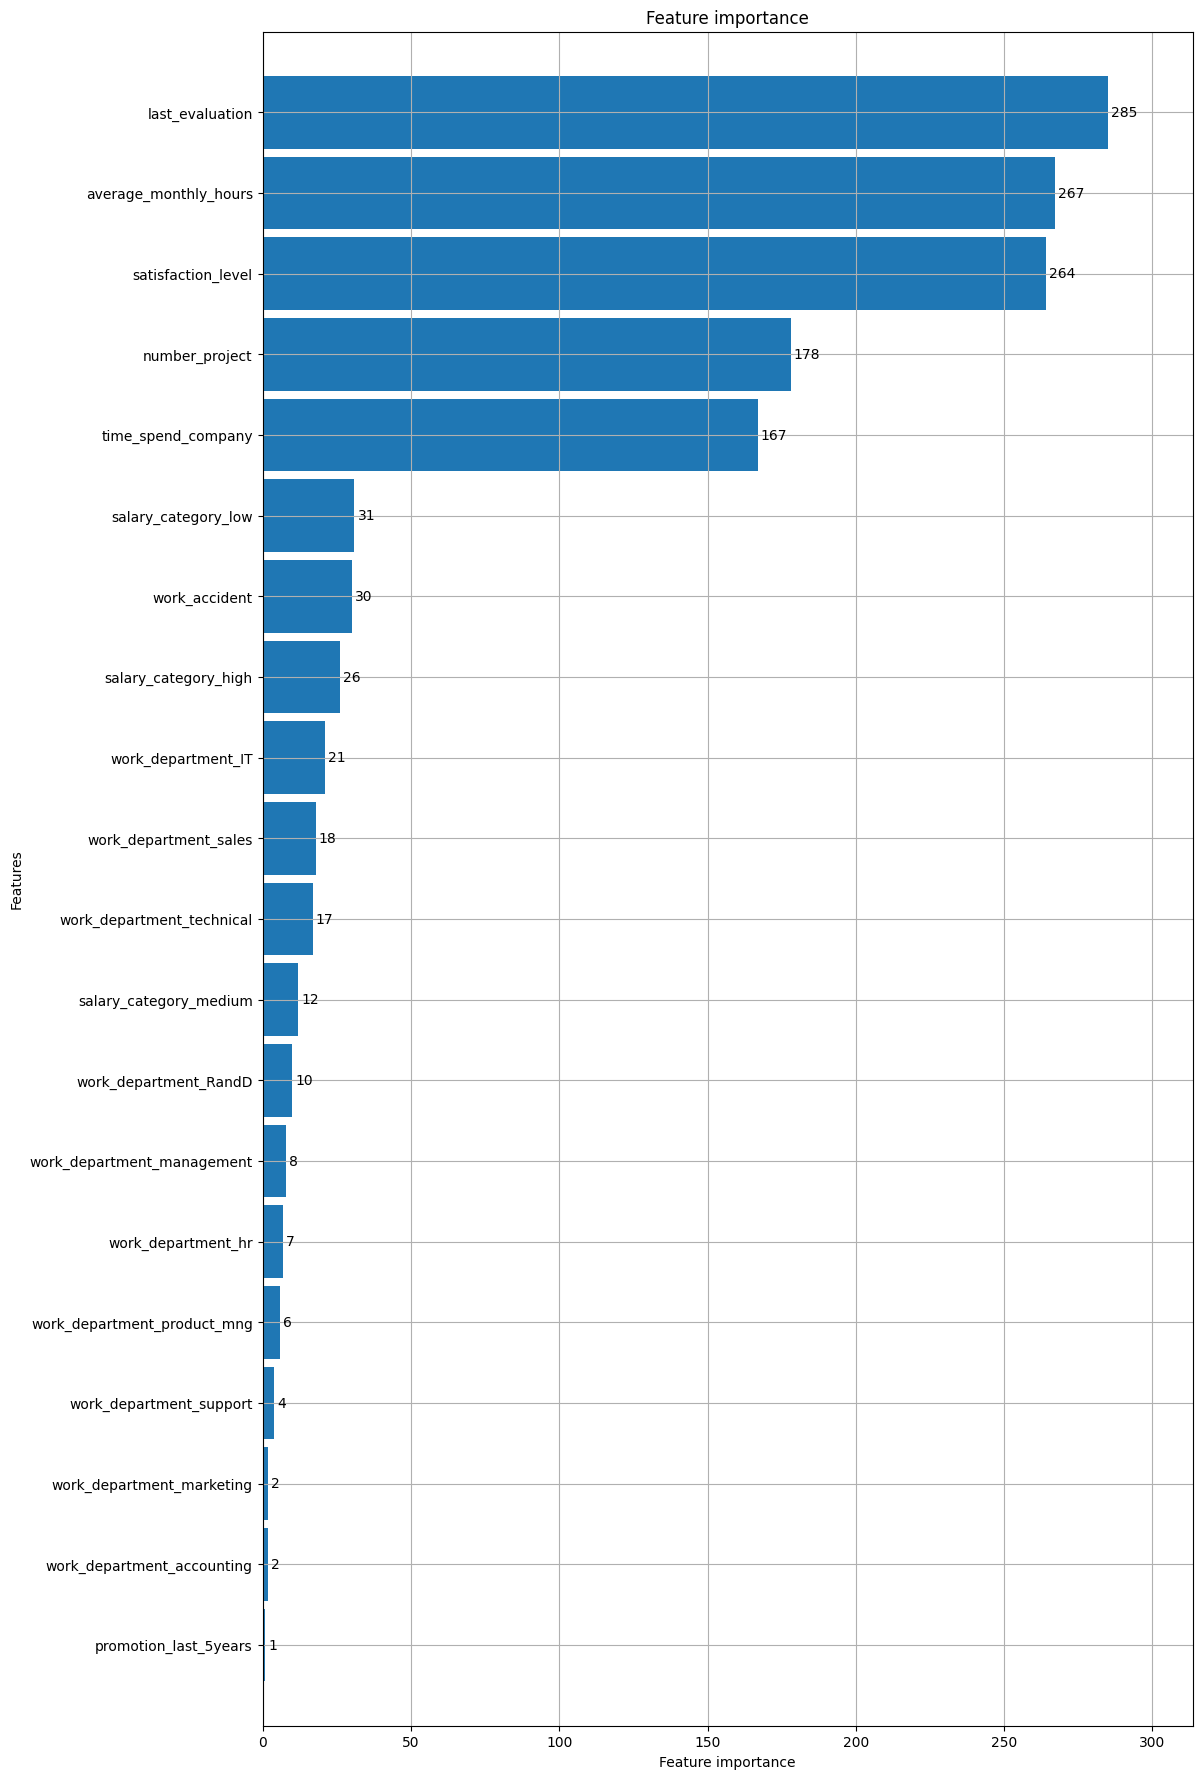

In [39]:
plt.rcParams["figure.figsize"] = (12, 22)

lgb.plot_importance(model1, max_num_features = 60, height=.9)

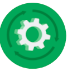
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
We tried logistic regression and a tree based model, LGBM, for this binary classification problem. LGBM is expected to learn more complex and non linear patterns from the data, and results were compatible.
              
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2003
           1       0.97      0.93      0.95       396

    accuracy                           0.98      2399
    macro avg      0.98      0.96      0.97      2399
    weighted avg   0.98      0.98      0.98      2399



These were our evaluation scores for the test set. Validation set were similar, too.






### Conclusion, Recommendations, Next Steps

The recall of our model was 93% for employee who leaves.

This means we can predict more 93% of them correctly. The company can take some measures by looking this.

The groups with more probability to leave the company:


*   Employee whose satisfaction level is below average (between 0.35 and 0.45) and last evaluation is below average(between 0.45 and 0.57). 
*   People whose satisfaction levels are really low(almost zero) and last evaluation score is very high(bw 0.75-0.97).

*   Group with satisfaction level is around zero(0.1, far below the average) and monthly average hours is far above the average(bw. 240-320). 

*   People who work 125-165 hours per month, and their satisfaction level is between around 0.35 and 0.45.

*   Another group who worked ~210-280 hours per month, and they had satisfaction levels ranging ~0.7-0.9. 

*   Underworked employees with low performance(120-160 hours monthly, 0.43-0.58 last evaluation score)

*   Overworked employees with high performance. (>210 hours per month, >0.75 last evaluation score)

Responsible staff should be careful about these spesific groups and understand what are the reasons of people to leave the company.
*   There is a sharp threshold for average monthly hours. 84% of the 238 employee who worked more than 285 hours a month have left the company. 
*   100% of 163 people who worked more than 290 hours have left the company.  

Managers should set a certain limit on the maximum working hours per month. People who work most should either be promoted or get a raise if setting a limit will is undesirable

Also, a limit should be set for number of project that employees work on because of the same reason. Ideal project number is 3. If company does not want employees to leave the company, they can limit number of project to 3 or 4. 
If they don't want to do that, rewards or additional compensation may be given for motivation and encouragement.

The people responsible for giving the evaluation score mostly gives high score to overworked employees. If the monthy average hours is a stronger criteria than quality of the work, this can be demotivating for certain people.
The evaluation criteria should be set and it should be take more parameters to the consideration.


Next Steps:

There are 2 features that may be subjective or may not reflect real thoughts. These are last evaluation score and satisfaction score. We don't know how satisfaction score is collected and whether all people can share their honest thougts. Also, we see that a better evaluation score is possible when we look at the distribution. So, we may consider dropping these column and compare the results. Also, if there is more information available about employees, we may consider adding them to our data. 

Possible Useful Informations:

Age, exact salaries, number of time they had salary raies, number of total work experience, average amount of time an employee stays in a company, how many times changed their companies etc.

Also, previous last evaluation scores, satisfaction scores, average monthly hours they work would be really helpful to analyze differences, increases and decreases and for ML models to learn patterns and give better results.

